# **Summary and Data Overview:**

We believe that one of the most crucial elements of strategic planning is predicting future sales for a company. Many seasons have sales that are significantly above or below average. The corporation risks suffering a significant financial loss if it is unaware of these seasons. Sales forecasting provides the business with guidance for stock placement, revenue estimation, and new investment decision-making. Knowing future sales is also advantageous since hitting predetermined goals at the start of each season can boost stock prices and investor views. We wanted to examine how future Weekly Sales of one of the largest US corporations would be impacted by internal and external factors. And, it will be a big problem especially for Walmart as a big company. Therefore, our objective for this project is to do full data analysis, including time series analysis, find the top-performing stores, and use multiple linear regression to predict sales.

We had access to four different CSV files from the dataset that we acquired from Kaggle.com about the company. The "stores.csv" file contains three different variables ( one categorical, two quantitative ) relating to store type and size. Then, "features.csv" file have mainly five different quantitative variables which contain additional data related to the store, department, and regional activity based on the given dates. And the "train.csv" file contains two different variables based on the given dates in which weekly_sales is a response variable as it depends on some internal and external factors. We did not use the "test.csv" file for our analysis as all the necessary information were already present in the other files. The project will use Supervised Learning as we have a response variable corresponding to its input data.

In [1]:
# importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # for visualization
import os # input Data files
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install plotly

In [3]:
# First, lets load the dataset into different dataframes

traindf=pd.read_csv('data/train.csv')
testdf=pd.read_csv('data/test.csv')
featuresdf=pd.read_csv('data/features.csv')
storesdf=pd.read_csv('data/stores.csv')

In [4]:
traindf

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
testdf

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
featuresdf

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
storesdf

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


# **Data Cleaning:**

In [8]:
featuresdf.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

We found that the dataset has missing values in CPI and unemployment columns. Because the values are spread within a wide range, we chose to drop those records, rather than filling them up with standard measures such as mean, median or mode. 

We also observed that Markdown values are typically promotional factors and it contains around 58% null values, So here we are avoiding/dropping them as well to perform neat analysis.

We observed that the variable Weekly_Sales has many outliers and some values below zero. But, we know that sales amount can not be a negative number as well as it is impossible for any department not to make any sales during an entire week. So, we will only include positive values of Weekly_Sales.

In [9]:
# data cleaning/data preprocessing

from statistics import mean
featuresdf.dropna(subset=['CPI','Unemployment'], inplace=True)

featuresdf=featuresdf.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [10]:
featuresdf.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [11]:
# Let's merge the features and train dataset to get insights

traindf=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')
traindf

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,both,B,118221


In [12]:
# After Data cleaning, now let's check for any outliers on sales values

traindf.loc[traindf['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


In [13]:
# considering only positive values for Weekly_Sales
traindf=traindf.loc[traindf['Weekly_Sales']>0] 
traindf=traindf.drop(['_merge'],axis=1)
traindf.sort_values(by='Date')
traindf['Weekly_Sales'] = traindf['Weekly_Sales']/1000
traindf = traindf.rename(columns={'Weekly_Sales': "Weekly_Sales(1000s)"})

In [14]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.

traindf['IsHoliday']= label_encoder.fit_transform(traindf['IsHoliday'].astype(str))
traindf['Type']= label_encoder.fit_transform(traindf['Type'].astype(str))

traindf

,Store,Dept,Date,Weekly_Sales(1000s),IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24.92450,0,42.31,2.572,211.096358,8.106,0,151315
1,1,1,2010-02-12,46.03949,1,38.51,2.548,211.242170,8.106,0,151315
2,1,1,2010-02-19,41.59555,0,39.93,2.514,211.289143,8.106,0,151315
3,1,1,2010-02-26,19.40354,0,46.63,2.561,211.319643,8.106,0,151315
4,1,1,2010-03-05,21.82790,0,46.50,2.625,211.350143,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,0.50837,0,64.88,3.997,192.013558,8.684,1,118221
421566,45,98,2012-10-05,0.62810,0,64.89,3.985,192.170412,8.667,1,118221
421567,45,98,2012-10-12,1.06102,0,54.47,4.000,192.327265,8.667,1,118221
421568,45,98,2012-10-19,0.76001,0,56.47,3.969,192.330854,8.667,1,118221


# **Data Analysis** and **Data Visualization:**

For the data visualization part, we created a pie chart and bar chart by comparing different variables to get deep insight in our data set. We also created a bar chart for Weekly sales for each store and a line plot to get insight of the weekly sales at each store based on the unemployment rate during that particular week. These visualizations are given below.

In [15]:
# Store varieties

print("The different stores are:",traindf['Type'].unique())

The different stores are: [0 1 2]


In [16]:
traindf.describe()

,Store,Dept,Weekly_Sales(1000s),IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16.033115,0.070345,60.090599,3.360890,171.212496,7.960000,0.589500,136749.732787
std,12.787236,30.508819,22.729492,0.255729,18.447857,0.458519,39.162445,1.863879,0.666407,60993.084568
min,1.000000,1.000000,0.000010,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2.120130,0.000000,46.680000,2.933000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7.661700,0.000000,62.090000,3.452000,182.350989,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20.271265,0.000000,74.280000,3.738000,212.445487,8.567000,1.000000,202505.000000
max,45.000000,99.000000,693.099360,1.000000,100.140000,4.468000,227.232807,14.313000,2.000000,219622.000000


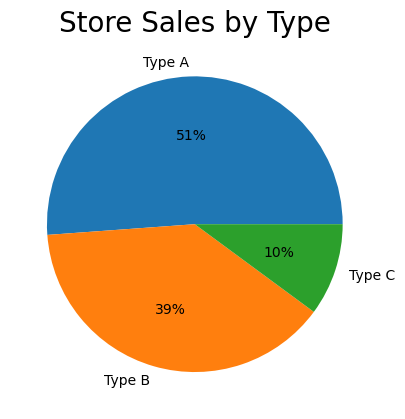

In [17]:
# Question 1
# Which store type has the most sales?

# data visualization
# Import libraries

import matplotlib.pyplot as plt
import numpy as np


# Creating dataset

stores = ['Type A','Type B','Type C']

data = traindf['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Store Sales by Type',fontsize=20)

# show plot
plt.show()

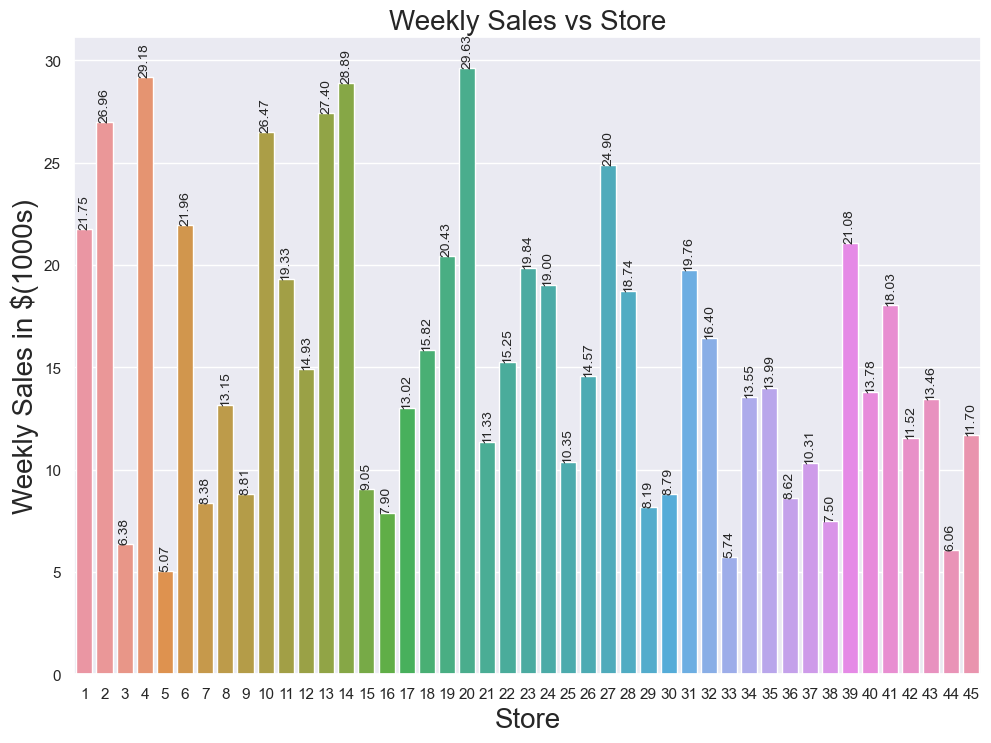

In [18]:
# Question 2
# What are the Weekly Sales at each Store?

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x='Store', y='Weekly_Sales(1000s)', data=tips, ci = None)
ax.set_title('Weekly Sales vs Store',fontsize=20)
ax.set_xlabel('Store',fontsize=20)
ax.set_ylabel('Weekly Sales in $(1000s)',fontsize=20)

ax.bar_label(ax.containers[0], rotation=90,fmt='{:,.2f}',fontsize=10)
plt.show()

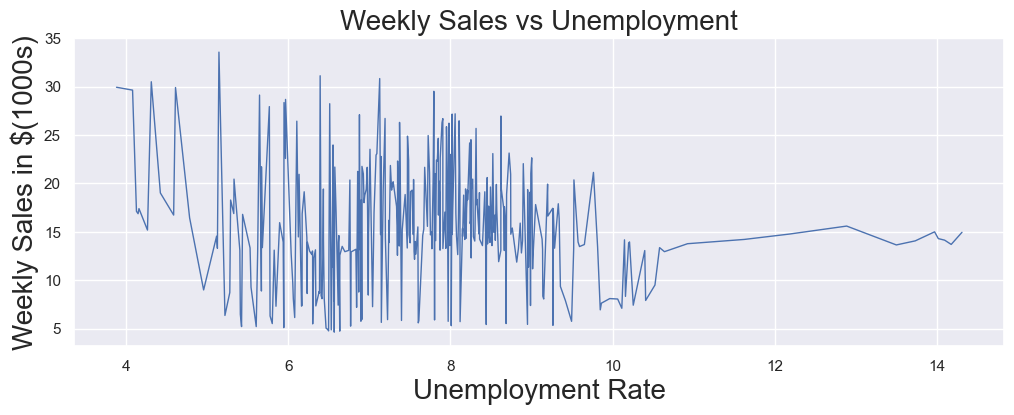

In [19]:
# Question 3
# What are the weekly sales based on the unemployement rate?

data = traindf

plt.figure(figsize=(12, 4))

ax=sns.lineplot(x="Unemployment", y="Weekly_Sales(1000s)", data=data, ci = None, linewidth=1)
sns.set_theme(style="whitegrid")

ax.set_title('Weekly Sales vs Unemployment',fontsize=20)
ax.set_xlabel('Unemployment Rate',fontsize=20)
ax.set_ylabel('Weekly Sales in $(1000s)',fontsize=20)
plt.show()

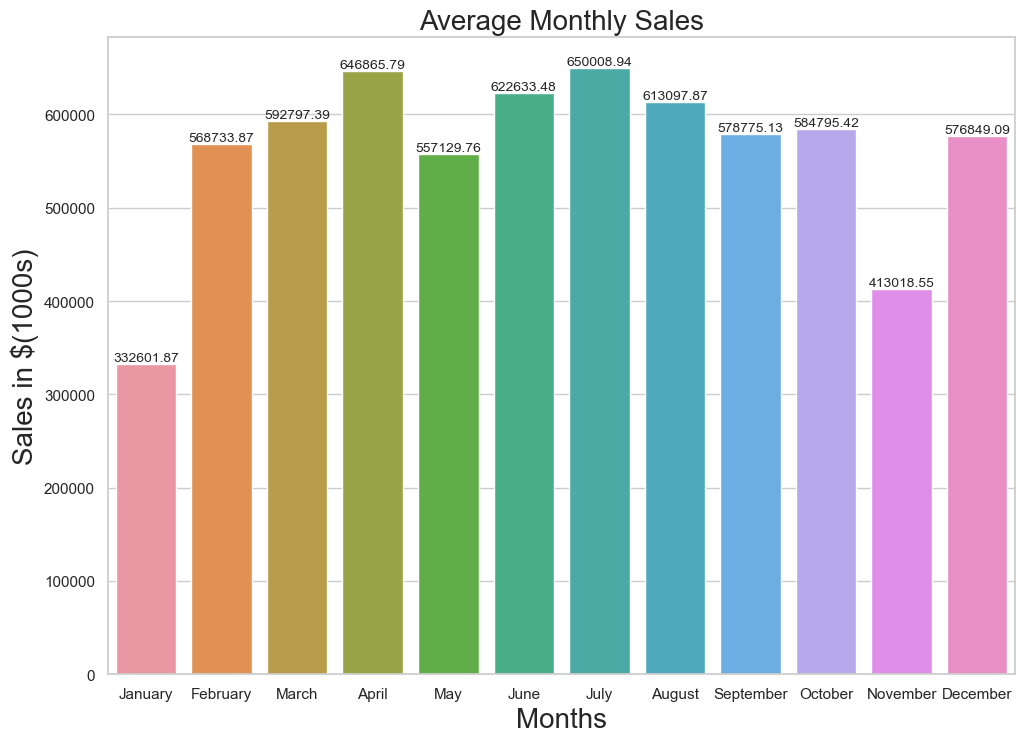

In [20]:
# Question 4
# What are the average monthly sales of three years?
weeklydf= traindf[['Date','Weekly_Sales(1000s)']]
weeklydf['Date']=pd.to_datetime(weeklydf['Date'])


sales = []
for i in range(12):
    sales.append(weeklydf[weeklydf['Date'].dt.month == i+1]['Weekly_Sales(1000s)'].sum())
    
bar_plot_data = {
    'x': ['January','February','March','April','May','June',
          'July','August','September','October','November','December'],
    'y': sales
}

ax=sns.barplot(x='x', y='y', data=bar_plot_data, ci=None)
sns.set_theme(style="whitegrid")
ax.set_title('Average Monthly Sales', fontsize=20)
ax.set_xlabel("Months",fontsize=20)
ax.set_ylabel("Sales in $(1000s)",fontsize=20)

ax.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fmt='%.2f',fontsize=10)
plt.show()


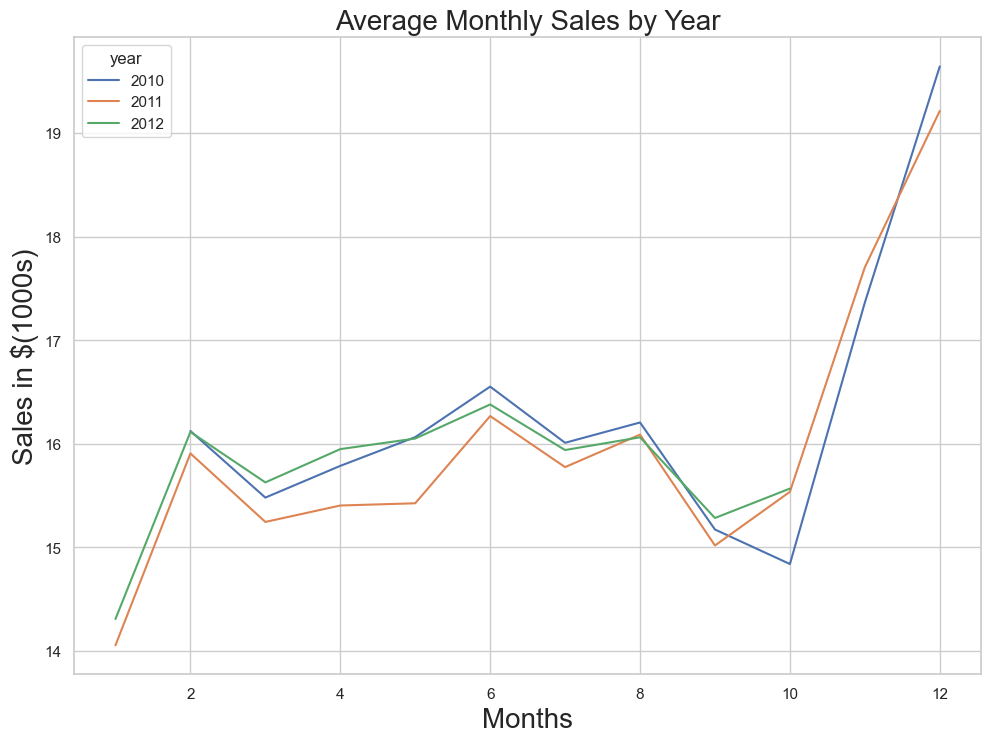

In [21]:
# Question 5
# What is the difference in the average monthly sales of three years?

yearlydf = traindf.copy()

yearlydf["Date"] = pd.to_datetime(yearlydf["Date"]) # convert to datetime
yearlydf['week'] =yearlydf['Date'].dt.week
yearlydf['month'] =yearlydf['Date'].dt.month 
yearlydf['year'] =yearlydf['Date'].dt.year

# to see the best months for sales
yearlydf.groupby('month')['Weekly_Sales(1000s)'].mean()

# to see the best years for sales
yearlydf.groupby('year')['Weekly_Sales(1000s)'].mean()

yearly_sales = pd.pivot_table(yearlydf, values = "Weekly_Sales(1000s)", columns = "year", index = "month")
ax=yearly_sales.plot()

ax.set_title('Average Monthly Sales by Year', fontsize=20)
ax.set_xlabel("Months",fontsize=20)
ax.set_ylabel("Sales in $(1000s)",fontsize=20)

plt.show()

In [22]:
traindf = traindf.sort_values(by='Date')
traindf

,Store,Dept,Date,Weekly_Sales(1000s),IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24.92450,0,42.31,2.572,211.096358,8.106,0,151315
140804,15,21,2010-02-05,3.25319,0,19.83,2.954,131.527903,8.350,1,123737
140661,15,20,2010-02-05,4.60690,0,19.83,2.954,131.527903,8.350,1,123737
140518,15,19,2010-02-05,1.38140,0,19.83,2.954,131.527903,8.350,1,123737
140408,15,18,2010-02-05,2.23925,0,19.83,2.954,131.527903,8.350,1,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2.22610,0,56.09,3.917,138.728161,8.243,1,120653
342211,36,16,2012-10-26,0.56450,0,74.39,3.494,222.113657,6.228,0,39910
390158,41,92,2012-10-26,131.12824,0,41.80,3.686,199.219532,6.195,0,196321
175485,18,81,2012-10-26,14.03652,0,56.09,3.917,138.728161,8.243,1,120653


# **Feature Selection:**

We used the Correlation Matrix for our feature selection process. The complete degree of correlation between the two variables is indicated by a value of + or - 1. We found that there is no strong correlation between any of the features, therefore we selected all features for the modelling part. Below is the heatmap of a correlation matrix based on the features.

[]

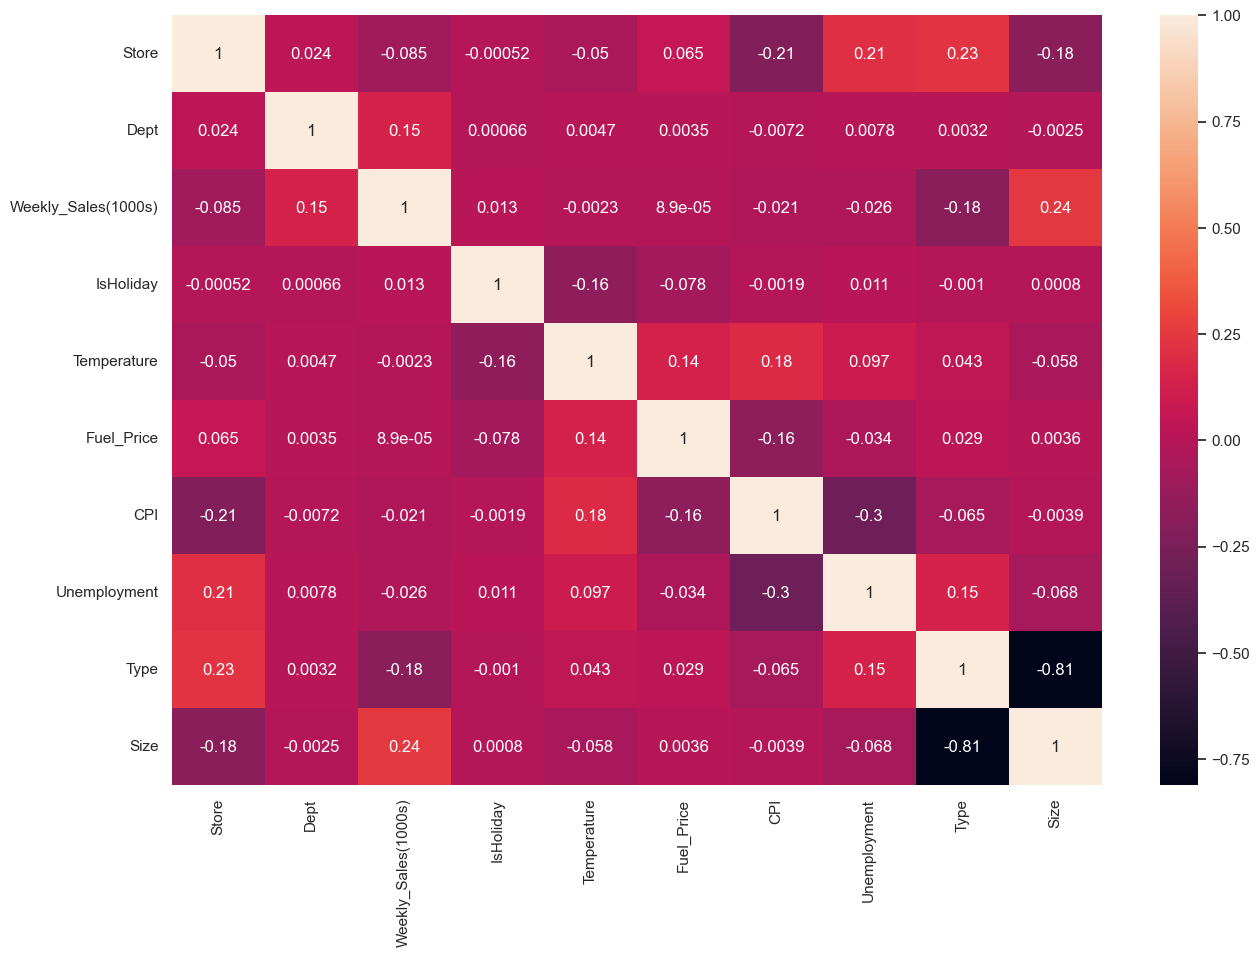

In [23]:
# correlation matrix

corr = traindf.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)
plt.plot()

We are splitting date into different features like column for year, column for day, and also adding a column for days which gives us the number of days to next christmas to get the deep insight for the sales prediction. We are removing the Weekly_sales column from my feature set as the Weekly_sales column is the one on which we have to predict our sales.

Therefore we have total 12 features which are: ‘Store’, ‘Dept’, ‘IsHoliday’, ‘Temperature’, ‘Fuel_price’, ‘CPI’, ‘Unemployment’, ‘Type’, ‘Size’, ‘Year’, ‘Day’, ‘Days to Next Christmas’ and ‘Weekly_sales’ as our response variable.

In [24]:
# Add column for day

traindf["Day"] = pd.to_datetime(traindf["Date"], format="%Y-%m-%d" ).dt.day
traindf["Year"] = pd.to_datetime(traindf["Date"], format="%Y-%m-%d" ).dt.year

# Add column for days to next Christmas

traindf["Days to Next Christmas"] = (pd.to_datetime(traindf["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(traindf["Date"], format="%Y-%m-%d")).dt.days.astype(int)

Features=traindf.drop(['Weekly_Sales(1000s)', 'Date'],axis=1)
Features

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Year,Days to Next Christmas
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,5,2010,329
140804,15,21,0,19.83,2.954,131.527903,8.350,1,123737,5,2010,329
140661,15,20,0,19.83,2.954,131.527903,8.350,1,123737,5,2010,329
140518,15,19,0,19.83,2.954,131.527903,8.350,1,123737,5,2010,329
140408,15,18,0,19.83,2.954,131.527903,8.350,1,123737,5,2010,329
...,...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,0,56.09,3.917,138.728161,8.243,1,120653,26,2012,66
342211,36,16,0,74.39,3.494,222.113657,6.228,0,39910,26,2012,66
390158,41,92,0,41.80,3.686,199.219532,6.195,0,196321,26,2012,66
175485,18,81,0,56.09,3.917,138.728161,8.243,1,120653,26,2012,66


# **Model Selection:**

We split the final data into a train and test set. We split the data into 80% training set and 20% test set. After Data visualization, all the features left happened to be numerical variables so there is no need to further handle it.

In [25]:
Target=traindf['Weekly_Sales(1000s)']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(Features, Target, test_size= 0.20, random_state=0)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Create and fit the Linear Regression model
lr = LinearRegression(fit_intercept=True, n_jobs=1)
lr.fit(x_train_normalized, y_train)

# Predict using the fitted model
y_pred = lr.predict(x_test_normalized)


In [29]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))
accuracy = lr.score(x_test,y_test)
print('Accuracy:',accuracy)

R2 score  : 0.08780685653577713
MSE score  : 476.74190024812776
RMSE:  21.834420080417242
Accuracy: -1712787318.20476


In [30]:
# random forest regressor
# After Hyper-parameter tunning

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 200,max_depth=10,n_jobs=5)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

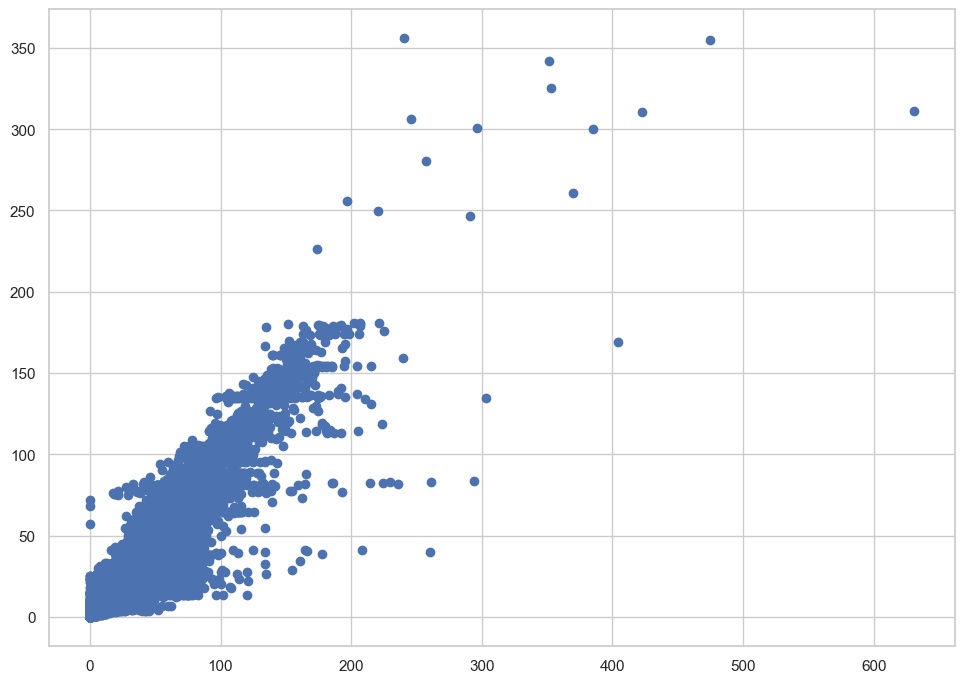

In [31]:
plt.scatter(y_test, y_pred)
plt.show()

In [32]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(x_test,y_test)
print('Accuracy',accuracy)

R2 score  : 0.8903707476543021
MSE score  : 57.295824311487394
RMSE:  7.5694005252389305
Accuracy 0.8903707476543021


# **Conclusion:**

In the model building for predicting Weekly_sales we have used Linear regression and a Tree based model random forest. Finally, after building models to predict the weekly sales of 45 stores, we got the best accuracy of around 88% %. Out of these models, we can select the Random-Forest as our predictive Model due to its large R2 value and lower RMSE of 7755.

The findings suggest that regression-based machine learning models such as Random Forest can improve prediction of future Weekly_sales of large companies like Walmart.